In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Use the citipy module to determine city based on latitude and longitude.
# The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.
from citipy import citipy


# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


632

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#loop through cities in list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create URL endpoint for city
    city_url = url + '&q=' + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # add 1 to record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | doha
Processing Record 2 of Set 1 | chegdomyn
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | otane
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | saint-augustin
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | mayo
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | stepantsevo
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | souillac
Processing Record 19 of Set 1 | kahului
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | barra do corda
Processing Re

Processing Record 36 of Set 4 | kirchhundem
Processing Record 37 of Set 4 | cayenne
Processing Record 38 of Set 4 | sangar
Processing Record 39 of Set 4 | jamestown
Processing Record 40 of Set 4 | kabare
Processing Record 41 of Set 4 | maniitsoq
Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | lebu
Processing Record 45 of Set 4 | olafsvik
Processing Record 46 of Set 4 | tanjung morawa
City not found. Skipping...
Processing Record 47 of Set 4 | saint-philippe
Processing Record 48 of Set 4 | kudahuvadhoo
Processing Record 49 of Set 4 | santa maria
Processing Record 50 of Set 4 | husavik
Processing Record 1 of Set 5 | beringovskiy
Processing Record 2 of Set 5 | andevoranto
City not found. Skipping...
Processing Record 3 of Set 5 | vallenar
Processing Record 4 of Set 5 | ossora
Processing Record 5 of Set 5 | wahran
City not found. Skipping...
Processing Record 6 of Set 5 | batemans bay
Processing Record 7 of Set 5 | fortuna


Processing Record 27 of Set 8 | nemuro
Processing Record 28 of Set 8 | laguna
Processing Record 29 of Set 8 | nenjiang
Processing Record 30 of Set 8 | bathsheba
Processing Record 31 of Set 8 | saint john
Processing Record 32 of Set 8 | mitsamiouli
Processing Record 33 of Set 8 | camacha
Processing Record 34 of Set 8 | nouadhibou
Processing Record 35 of Set 8 | smidovich
Processing Record 36 of Set 8 | alofi
Processing Record 37 of Set 8 | chuy
Processing Record 38 of Set 8 | passo fundo
Processing Record 39 of Set 8 | auka
Processing Record 40 of Set 8 | leh
Processing Record 41 of Set 8 | blackwater
Processing Record 42 of Set 8 | ajaccio
Processing Record 43 of Set 8 | wagar
Processing Record 44 of Set 8 | whitehorse
Processing Record 45 of Set 8 | pedregulho
Processing Record 46 of Set 8 | abu dhabi
Processing Record 47 of Set 8 | aksu
Processing Record 48 of Set 8 | aras
Processing Record 49 of Set 8 | kieta
Processing Record 50 of Set 8 | lakes entrance
Processing Record 1 of Set 

Processing Record 14 of Set 12 | kotelnikovo
Processing Record 15 of Set 12 | merauke
Processing Record 16 of Set 12 | namatanai
Processing Record 17 of Set 12 | concordia
Processing Record 18 of Set 12 | mongomo
Processing Record 19 of Set 12 | bestobe
Processing Record 20 of Set 12 | tokonou
Processing Record 21 of Set 12 | kivertsi
Processing Record 22 of Set 12 | ogbomosho
Processing Record 23 of Set 12 | nelson bay
Processing Record 24 of Set 12 | malwan
City not found. Skipping...
Processing Record 25 of Set 12 | samarai
Processing Record 26 of Set 12 | sorland
Processing Record 27 of Set 12 | severo-kurilsk
Processing Record 28 of Set 12 | chivilcoy
Processing Record 29 of Set 12 | ust-maya
Processing Record 30 of Set 12 | camopi
Processing Record 31 of Set 12 | amarwara
Processing Record 32 of Set 12 | meulaboh
Processing Record 33 of Set 12 | belaya gora
Processing Record 34 of Set 12 | babu
Processing Record 35 of Set 12 | bay roberts
Processing Record 36 of Set 12 | chokurda

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Doha,25.2867,51.5333,62.58,67,0,11.50,QA,2022-02-02 21:42:28
1,Chegdomyn,51.1167,133.0167,-23.33,100,100,1.45,RU,2022-02-02 21:37:41
2,Yellowknife,62.4560,-114.3525,-21.71,75,20,3.44,CA,2022-02-02 21:42:29
3,Hithadhoo,-0.6000,73.0833,81.75,70,57,5.53,MV,2022-02-02 21:42:29
4,Castro,-24.7911,-50.0119,66.94,90,32,5.30,BR,2022-02-02 21:42:29
5,Mataura,-46.1927,168.8643,57.47,97,100,3.96,NZ,2022-02-02 21:42:30
6,Otane,-39.8833,176.6333,77.38,38,100,3.31,NZ,2022-02-02 21:42:30
7,Ushuaia,-54.8000,-68.3000,46.06,57,75,20.71,AR,2022-02-02 21:42:30
8,Saint-Augustin,51.2260,-58.6502,23.79,82,100,24.43,CA,2022-02-02 21:42:30
9,Tuktoyaktuk,69.4541,-133.0374,-22.00,69,75,11.50,CA,2022-02-02 21:42:31


In [8]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Doha,QA,2022-02-02 21:42:28,25.2867,51.5333,62.58,67,0,11.50
1,Chegdomyn,RU,2022-02-02 21:37:41,51.1167,133.0167,-23.33,100,100,1.45
2,Yellowknife,CA,2022-02-02 21:42:29,62.4560,-114.3525,-21.71,75,20,3.44
3,Hithadhoo,MV,2022-02-02 21:42:29,-0.6000,73.0833,81.75,70,57,5.53
4,Castro,BR,2022-02-02 21:42:29,-24.7911,-50.0119,66.94,90,32,5.30
5,Mataura,NZ,2022-02-02 21:42:30,-46.1927,168.8643,57.47,97,100,3.96
6,Otane,NZ,2022-02-02 21:42:30,-39.8833,176.6333,77.38,38,100,3.31
7,Ushuaia,AR,2022-02-02 21:42:30,-54.8000,-68.3000,46.06,57,75,20.71
8,Saint-Augustin,CA,2022-02-02 21:42:30,51.2260,-58.6502,23.79,82,100,24.43
9,Tuktoyaktuk,CA,2022-02-02 21:42:31,69.4541,-133.0374,-22.00,69,75,11.50


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

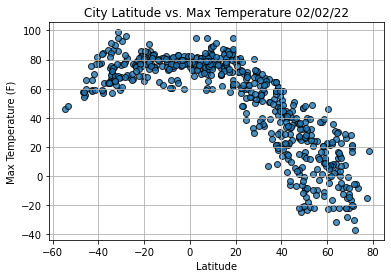

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

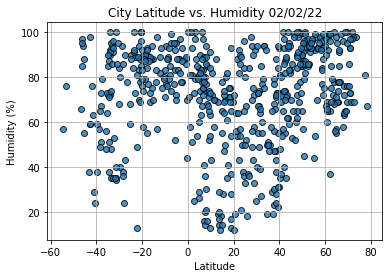

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

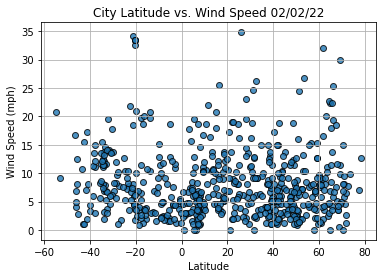

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):


In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
index13 = city_data_df.loc[13]
index13

City                  Stepantsevo
Country                        RU
Date          2022-02-02 21:42:31
Lat                       56.1314
Lng                       41.7032
Max Temp                    13.44
Humidity                       98
Cloudiness                     97
Wind Speed                   4.23
Name: 13, dtype: object

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Doha,QA,2022-02-02 21:42:28,25.2867,51.5333,62.58,67,0,11.50
1,Chegdomyn,RU,2022-02-02 21:37:41,51.1167,133.0167,-23.33,100,100,1.45
2,Yellowknife,CA,2022-02-02 21:42:29,62.4560,-114.3525,-21.71,75,20,3.44
8,Saint-Augustin,CA,2022-02-02 21:42:30,51.2260,-58.6502,23.79,82,100,24.43
9,Tuktoyaktuk,CA,2022-02-02 21:42:31,69.4541,-133.0374,-22.00,69,75,11.50
...,...,...,...,...,...,...,...,...,...
574,Pueblo Nuevo,MX,2022-02-02 21:44:44,23.3833,-105.3833,62.31,21,2,8.66
575,Hailun,CN,2022-02-02 21:44:44,47.4500,126.9333,-21.60,100,71,1.88
576,Poronaysk,RU,2022-02-02 21:44:45,49.2167,143.1167,-3.19,93,43,6.71
578,Hofn,IS,2022-02-02 21:44:45,64.2539,-15.2082,29.59,56,100,4.72


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

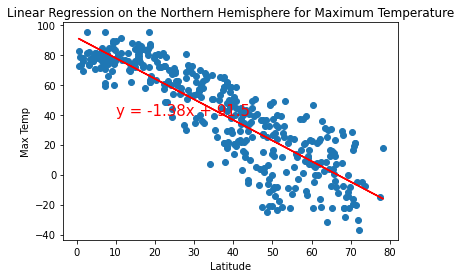

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", 
                       "Max Temp",(10,40))

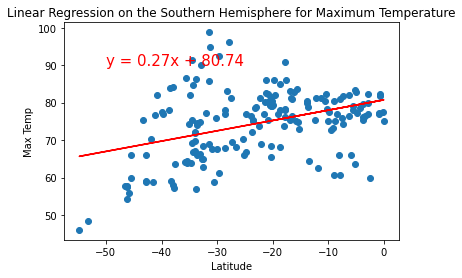

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,90))

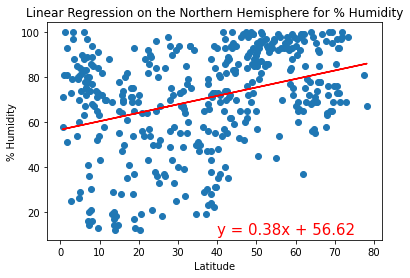

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))


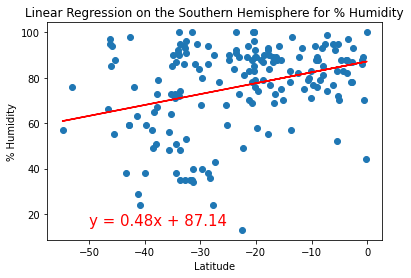

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,15))


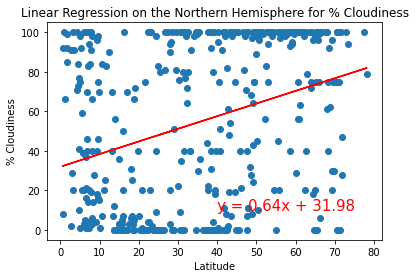

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(40,10))

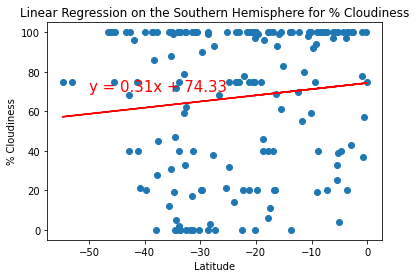

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,70))

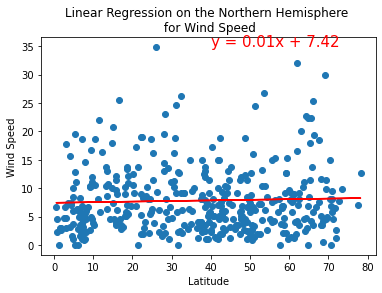

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed", 
                       "Wind Speed",(40,35))


In [26]:
 Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed", 
                       "Wind Speed",(-50,35))


SyntaxError: invalid syntax (176749776.py, line 1)